In [2]:
import importlib
import os
import fnmatch
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import csv
from sklearn import tree
import sys
sys.stdout.flush()
import math
import matplotlib.pyplot as plt
from matplotlib.table import Table
import segment_cluster as sc
import importlib
importlib.reload(sc)
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

/home/jkok1g14/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


delta 488.0557028289329


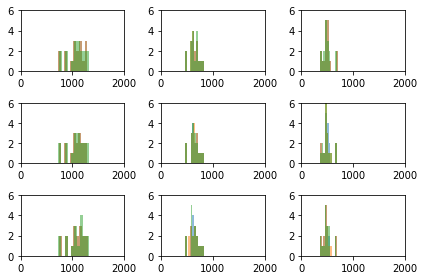

phi 195.07316388300913


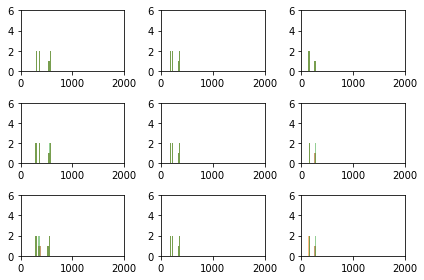

mu 716.0020096705756


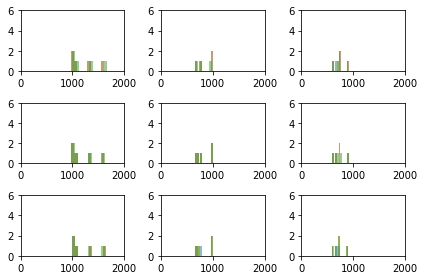

rho 371.3619826696129


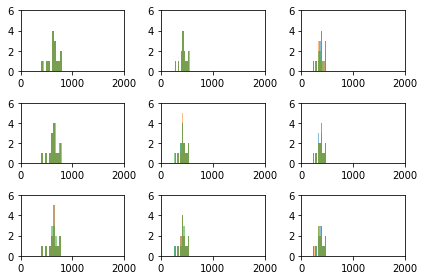

beta 501.18821472263943


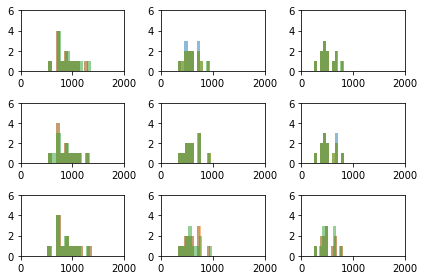

alpha 185.68785544096627


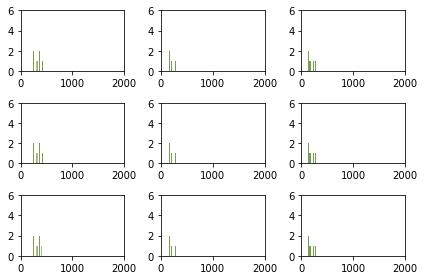

kappa 522.4076922188135


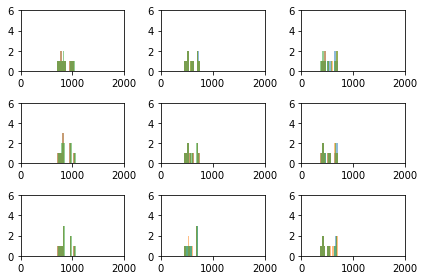

chi 255.00390749019826


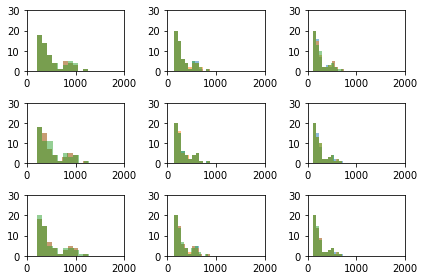

gamma 553.6789307248514


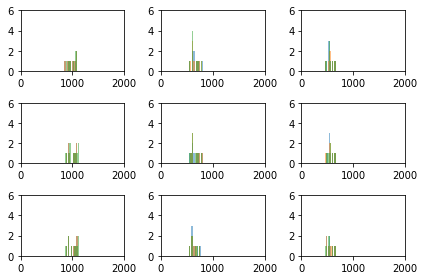

theta 484.2175637812884


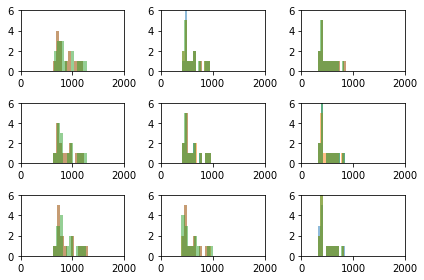

synthetic 313.3992669052627


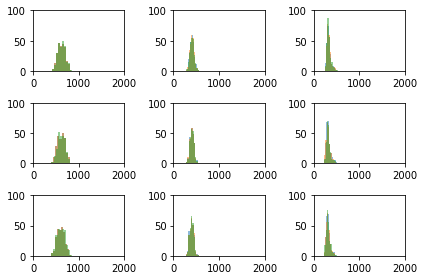

In [110]:
#plot histograms of error values for all classes except from rho
class_names=['delta', 'phi', 'mu', 'rho', 'beta', 'alpha', 'kappa', 'chi', 'gamma', 'theta',"synthetic"]
results=np.loadtxt("valid_results_20190426.csv", dtype=float, delimiter=",")
results=results.reshape((3,3,3,401,6))
for class_index, class_name in enumerate(class_names):
    n=0
    if class_index==10:
        class_index=11
    for k, clusters in enumerate(results):
        for l, length in enumerate(clusters):
            n+=1
            for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
                errors=slide
                class_error_indices=np.where(slide[:,3]==class_index)[0]
                class_errors = errors[class_error_indices]
                #print(class_index,k,l,s,np.mean(class_errors[:,-1]))
                plt.subplot(3,3,n)
                plt.hist(class_errors[:,-1], alpha = 0.5)
                plt.xlim([0,2000])
                if class_index==7:
                    plt.ylim([0,30])
                elif class_index==11:
                    plt.ylim([0,100])
                else:
                    plt.ylim([0,6])
                
    print(class_name, np.mean(class_errors[:,-1]))
    plt.tight_layout()
    plt.show()

In [68]:
#plot histograms of error values for all classes except from rho
class_names=['delta', 'phi', 'mu', 'rho', 'beta', 'alpha', 'kappa', 'chi', 'gamma', 'theta']


results=np.loadtxt("valid_results_20190426.csv", dtype=float, delimiter=",")
results=results.reshape((3,3,3,401,6))
for k, clusters in enumerate(results):
    for l, length in enumerate(clusters):
        for s, slide in enumerate(length):
            if s>0:
                continue
            class_errors_index=np.where(slide[:,3]==len(class_names)+1)[0]
            class_errors=slide[class_errors_index]
            max_synth=np.max(class_errors[:,-1])
            mean_synth=np.mean(class_errors[:,-1])
            print(k,l,s,"synthetic","\t",max_synth, mean_synth)
            neg_min_count=0
            neg_mean_count=0
            neg_min_total=0
            neg_mean_total=0
            total_neg_count=0
            for class_index, class_name in enumerate(class_names):
                class_errors_index=np.where(slide[:,3]==class_index)[0]
                class_errors=slide[class_errors_index]
                neg_count=0
                for observation in class_errors:
                    if observation[-1]<max_synth:
                        neg_count+=1
                min_error=np.min(class_errors[:,-1])-max_synth
                mean_error=np.mean(class_errors[:,-1])-mean_synth
                print(k,l,s,class_name,"\t",min_error, mean_error, neg_count)
                total_neg_count+=neg_count
                if min_error<0:
                    neg_min_count+=1
                    neg_min_total+=min_error
                if mean_error<0:
                    neg_mean_count+=1
                    neg_mean_total+=mean_error
            print("No. unseparated classes: ", neg_min_count, "No. low error classes: ", neg_mean_count)
            print("Total overlap: ", neg_min_total, "Total Mean error difference: ", neg_mean_total)
            print("Misclassified observations: ", total_neg_count)
            print()

0 0 0 synthetic 	 841.8704877853467 620.2037358398725
0 0 0 delta 	 -114.18656753085361 438.35395200930066 2
0 0 0 phi 	 -553.0820987073095 -187.17929696714674 7
0 0 0 mu 	 122.73651851093712 576.7426499864773 0
0 0 0 rho 	 -439.45359081131335 20.174072882600512 14
0 0 0 beta 	 -312.2459594301981 239.19271093456746 6
0 0 0 alpha 	 -600.3061997037977 -293.4140261149946 6
0 0 0 kappa 	 -138.99209337701552 231.64931507456356 6
0 0 0 chi 	 -631.0229519973204 -136.05505530399995 50
0 0 0 gamma 	 2.299036269710541 370.6067400069795 0
0 0 0 theta 	 -210.23210502865913 242.697997281546 8
No. unseparated classes:  8 No. low error classes:  3
Total overlap:  -2999.521566586467 Total Mean error difference:  -616.6483783861413
Misclassified observations:  99

0 1 0 synthetic 	 560.512592686521 407.56991828578066
0 1 0 delta 	 -101.15763326742973 235.2180938159164 2
0 1 0 phi 	 -387.5913437171404 -141.60511492239738 7
0 1 0 mu 	 97.45078282251302 419.1588169077504 0
0 1 0 rho 	 -295.5165260264803 2

In [92]:
#plot histograms of error values for all classes except from rho
class_names=['delta', 'beta', 'alpha', 'chi', 'phi', 'rho', 'theta', 'kappa', 'gamma', 'mu']

k_clusters=[10, 50, 100, 150]
seg_lens=[4,8,12,30,50]

results=np.loadtxt("valid_results_20190501.csv", dtype=float, delimiter=",")
results=results.reshape((4,5,401,6))
for k, clusters in enumerate(results):
    for l, length in enumerate(clusters):
            class_errors_index=np.where(length[:,3]==len(class_names)+1)[0]
            class_errors=length[class_errors_index]
            max_synth=np.max(class_errors[:,-1])
            mean_synth=np.mean(class_errors[:,-1])
            std_synth=np.std(class_errors[:,-1])
            rho_neg_count=0
            for observation in class_errors[:,-1]:
                    if observation>mean_synth+std_synth*2:
                        rho_neg_count+=1
            print(k_clusters[k],seg_lens[l],"synthetic","\t",max_synth, mean_synth, rho_neg_count)
            neg_min_count=0
            neg_mean_count=0
            neg_min_total=0
            neg_mean_total=0
            total_neg_count=0
            for class_index, class_name in enumerate(class_names):
                class_errors_index=np.where(length[:,3]==class_index)[0]
                class_errors=length[class_errors_index]
                neg_count=0
                for observation in class_errors:
                    if observation[-1]<mean_synth+std_synth*2:
                        neg_count+=1
                min_error=np.min(class_errors[:,-1])-max_synth
                mean_error=np.mean(class_errors[:,-1])-mean_synth
                print(k_clusters[k],seg_lens[l],class_name,"\t",min_error, mean_error, neg_count)
                total_neg_count+=neg_count
                if min_error<0:
                    neg_min_count+=1
                    neg_min_total+=min_error
                if mean_error<0:
                    neg_mean_count+=1
                    neg_mean_total+=mean_error
            print("No. unseparated classes: ", neg_min_count, "No. low error classes: ", neg_mean_count)
            print("Total overlap: ", neg_min_total, "Total Mean error difference: ", neg_mean_total)
            print("Misclassified observations: ", total_neg_count)
            print()

10 4 synthetic 	 638.0990680834057 241.8741918313263 9
10 4 delta 	 -450.0549998335866 37.25948163943178 16
10 4 beta 	 -470.03714028917796 176.17821242451822 6
10 4 alpha 	 -552.4307892661537 -112.38564361213685 6
10 4 chi 	 -559.390697528164 -57.80583603979471 53
10 4 phi 	 -580.9354225378767 -138.6544326060191 7
10 4 rho 	 -502.56241440009853 57.543487418939435 14
10 4 theta 	 -411.3074729842037 183.87632864490155 8
10 4 kappa 	 -354.08794540789944 187.0716758354484 4
10 4 gamma 	 -366.9510447180708 171.79002091793967 5
10 4 mu 	 -174.61977894688715 326.21323255181863 0
No. unseparated classes:  10 No. low error classes:  3
Total overlap:  -4422.3777059121185 Total Mean error difference:  -308.84591225795066
Misclassified observations:  119

10 8 synthetic 	 629.0855386202235 306.44498223909244 13
10 8 delta 	 -390.93251446792783 54.32004268553578 15
10 8 beta 	 -440.72153363357114 182.7775942815539 6
10 8 alpha 	 -528.213625968091 -139.4879742963969 6
10 8 chi 	 -538.9441857835963 

In [94]:
#plot histograms of error values for all classes except from rho
class_names=['delta', 'beta', 'alpha', 'chi', 'phi', 'rho', 'theta', 'kappa', 'gamma', 'mu']

k_clusters=[10, 50, 100, 150]
seg_lens=[4,8,12,30,50]

results=np.loadtxt("valid_results_20190501_sine.csv", dtype=float, delimiter=",")
results=results.reshape((4,5,401,6))
for k, clusters in enumerate(results):
    for l, length in enumerate(clusters):
            class_errors_index=np.where(length[:,3]==len(class_names)+1)[0]
            class_errors=length[class_errors_index]
            max_synth=np.max(class_errors[:,-1])
            mean_synth=np.mean(class_errors[:,-1])
            std_synth=np.std(class_errors[:,-1])
            rho_neg_count=0
            for observation in class_errors[:,-1]:
                    if observation>mean_synth+std_synth*2:
                        rho_neg_count+=1
            print(k_clusters[k],seg_lens[l],"synthetic","\t",max_synth, mean_synth, rho_neg_count)
            neg_min_count=0
            neg_mean_count=0
            neg_min_total=0
            neg_mean_total=0
            total_neg_count=0
            for class_index, class_name in enumerate(class_names):
                class_errors_index=np.where(length[:,3]==class_index)[0]
                class_errors=length[class_errors_index]
                neg_count=0
                for observation in class_errors:
                    if observation[-1]<mean_synth+std_synth*2:
                        neg_count+=1
                min_error=np.min(class_errors[:,-1])-max_synth
                mean_error=np.mean(class_errors[:,-1])-mean_synth
                print(k_clusters[k],seg_lens[l],class_name,"\t",min_error, mean_error, neg_count)
                total_neg_count+=neg_count
                if min_error<0:
                    neg_min_count+=1
                    neg_min_total+=min_error
                if mean_error<0:
                    neg_mean_count+=1
                    neg_mean_total+=mean_error
            print("No. unseparated classes: ", neg_min_count, "No. low error classes: ", neg_mean_count)
            print("Total overlap: ", neg_min_total, "Total Mean error difference: ", neg_mean_total)
            print("Misclassified observations: ", total_neg_count)
            print()

10 4 synthetic 	 2455.7777988631556 1778.1459342711498 4
10 4 delta 	 -599.9055147092843 841.2200181485848 6
10 4 beta 	 -301.0436989400978 1391.7720972359218 2
10 4 alpha 	 -939.6452686136795 796.1206583018204 5
10 4 chi 	 -1321.9340921196247 43.61088891505824 14
10 4 phi 	 390.9230217256104 1763.5752141249493 0
10 4 rho 	 -393.749751454729 699.7212358419454 3
10 4 theta 	 -1783.4086753765678 -865.2231665692749 6
10 4 kappa 	 -1623.9949095515963 -534.2208259452527 7
10 4 gamma 	 172.12883969736822 1189.4239053668641 0
10 4 mu 	 -1874.8768766517342 -378.34543927436926 46
No. unseparated classes:  8 No. low error classes:  3
Total overlap:  -8838.558787417314 Total Mean error difference:  -1777.7894317888968
Misclassified observations:  89

10 8 synthetic 	 2306.2907605739792 1656.7481120722043 3
10 8 delta 	 -582.4142119039643 784.8757880924284 6
10 8 beta 	 -302.94290606564596 1286.452462180075 2
10 8 alpha 	 -910.3500185161774 736.7219282070621 5
10 8 chi 	 -1247.4260798853386 36.344

In [65]:
length=results[0][0]

class_errors_index=np.where(length[:,3]==len(class_names)+1)[0]
class_errors=length[class_errors_index]
min_synth=np.min(class_errors[:,-1])
mean_synth=np.mean(class_errors[:,-1])
np.std(class_errors[:,-1])

82.83444945530464

In [59]:
class_errors_index=np.where(length[:,3]==2)[0]
class_errors=length[class_errors_index]
min_alpha=np.min(class_errors[:,-1])
mean_alpha=np.mean(class_errors[:,-1])

theta


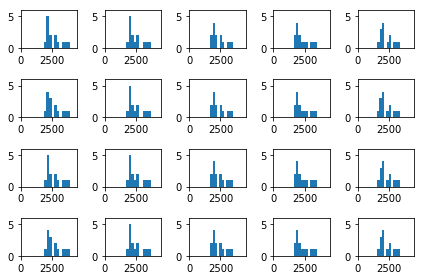

delta


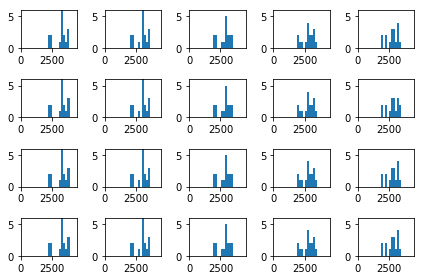

beta


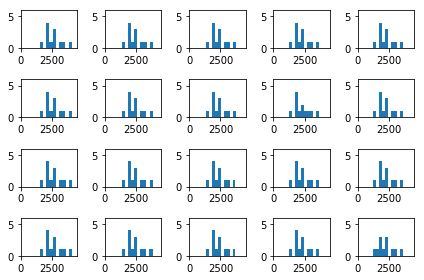

rho


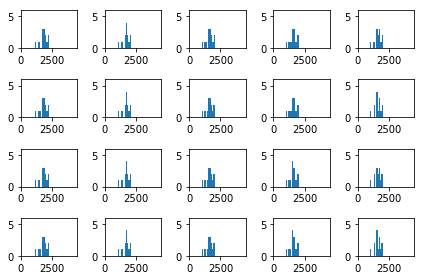

mu


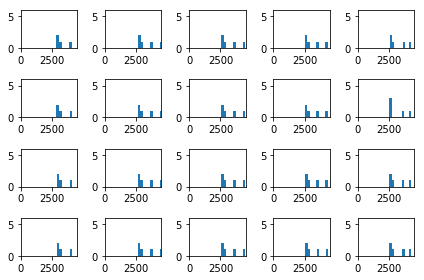

kappa


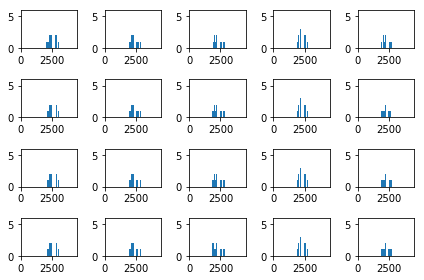

alpha


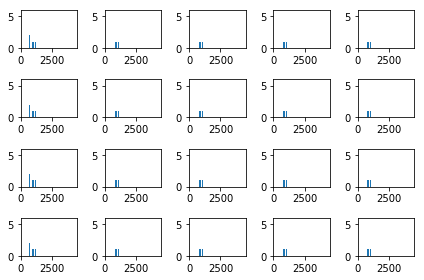

phi


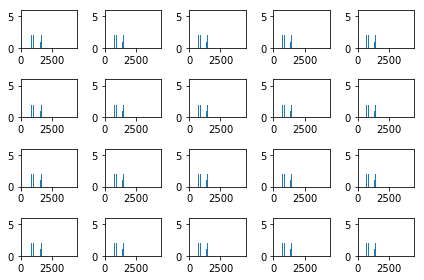

gamma


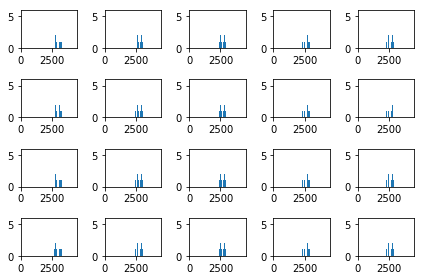

chi


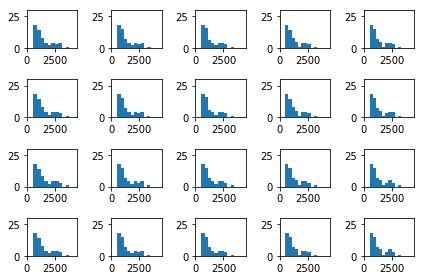

synthetic


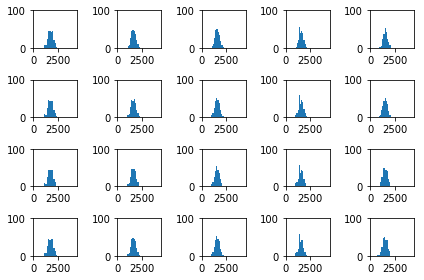

In [85]:
#plot histograms of error values for all classes except from rho
class_names=['theta', 'delta', 'beta', 'rho', 'mu', 'kappa', 'alpha', 'phi', 'gamma', 'chi',"synthetic"]
results=np.loadtxt("valid_results_20190501_sine.csv", dtype=float, delimiter=",")
results=results.reshape((4,5,401,6))
for class_index, class_name in enumerate(class_names):
    n=0
    if class_index==10:
        class_index=11
    for k, clusters in enumerate(results):
        for l, length in enumerate(clusters):
            n+=1
          #  for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
            errors=length
            class_error_indices=np.where(length[:,3]==class_index)[0]
            class_errors = errors[class_error_indices]
            #print(class_index,k,l,s,np.mean(class_errors[:,-1]))
            plt.subplot(4,5,n)
            plt.hist(class_errors[:,-1], alpha = 1)
            plt.xlim([0,4500])
            if class_index==9:
                plt.ylim([0,30])
            elif class_index==11:
                plt.ylim([0,100])
            else:
                plt.ylim([0,6])
                
    print(class_name) #np.mean(class_errors[:,-1]))
    plt.tight_layout()
    plt.show()

delta 680.4670839096821


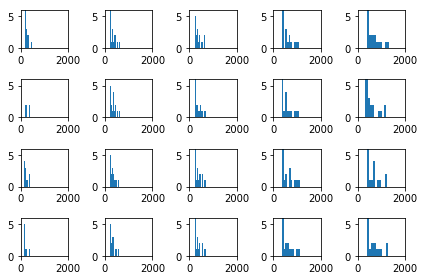

beta 884.3411436668371


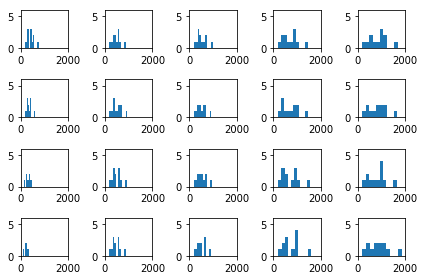

alpha 240.97894730045775


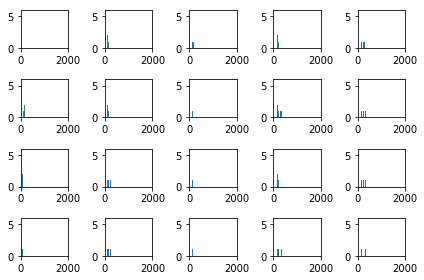

chi 307.11302757296977


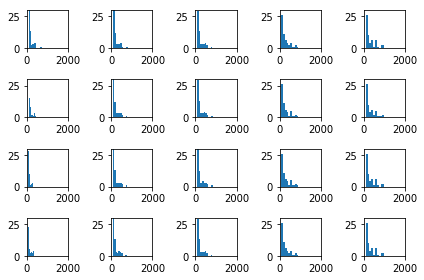

phi 201.97100303433243


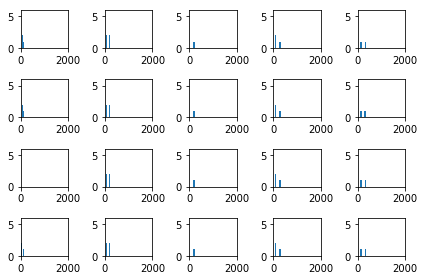

rho 483.0657885915826


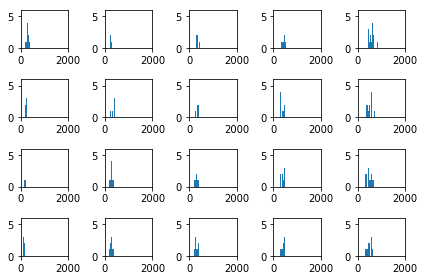

theta 712.095385017312


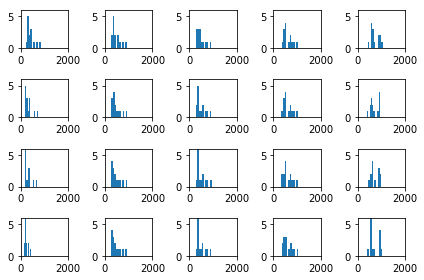

kappa 1062.241683008482


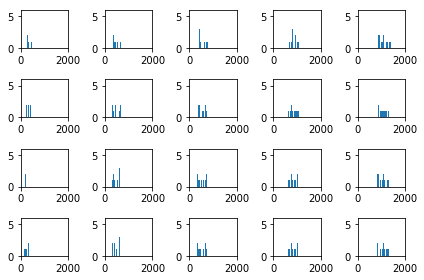

gamma 726.1515409968556


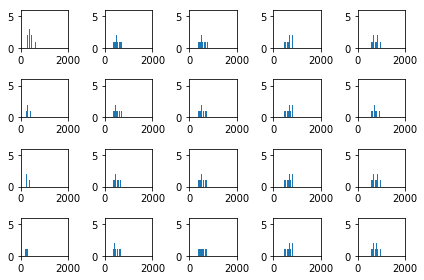

mu 1307.3062999958897


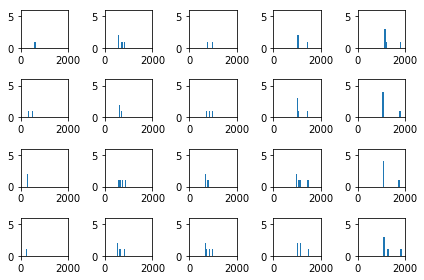

synthetic 353.06474102834227


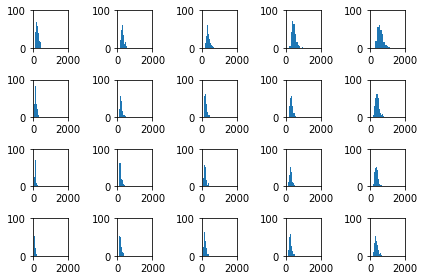

In [84]:
#plot histograms of error values for all classes except from rho
class_names=['delta', 'beta', 'alpha', 'chi', 'phi', 'rho', 'theta', 'kappa', 'gamma', 'mu',"synthetic"]
results=np.loadtxt("valid_results_20190501.csv", dtype=float, delimiter=",")
results=results.reshape((4,5,401,6))
for class_index, class_name in enumerate(class_names):
    n=0
    if class_index==10:
        class_index=11
    for k, clusters in enumerate(results):
        for l, length in enumerate(clusters):
            n+=1
          #  for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
            errors=length
            class_error_indices=np.where(length[:,3]==class_index)[0]
            class_errors = errors[class_error_indices]
            #print(class_index,k,l,s,np.mean(class_errors[:,-1]))
            plt.subplot(4,5,n)
            plt.hist(class_errors[:,-1], alpha = 1)
            plt.xlim([0,2000])
            if class_index==3:
                plt.ylim([0,30])
            elif class_index==11:
                plt.ylim([0,100])
            else:
                plt.ylim([0,6])
                
    print(class_name, np.mean(class_errors[:,-1]))
    plt.tight_layout()
    plt.show()